In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

In [2]:
X,y = make_regression(n_samples = 1000,n_features = 1,noise = 42)
df = pd.DataFrame({'input':X.reshape(-1,),'output':y.reshape(-1,)})

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [4]:
m = Ridge(alpha = 0.01)
m.fit(X_train,y_train)
y_pred = m.predict(X_test)

In [5]:
m.coef_

array([30.17267825])

In [6]:
m.intercept_

1.942086300952981

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3689648208422558

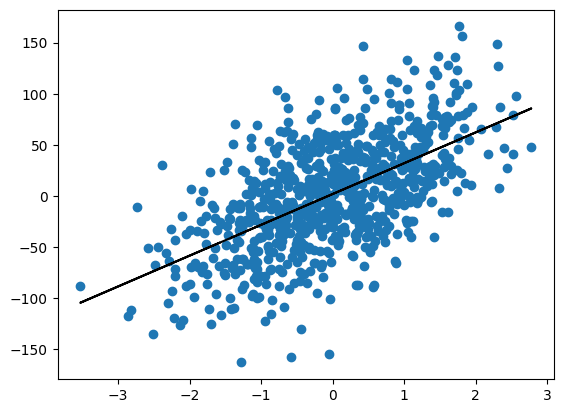

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_train,m.predict(X_train),c = 'black')

Function to use Ridge regression and plot the graph by providing the value of alpha to function

In [9]:
def ridge(alpha):
    
    m = Ridge(alpha = alpha)
    m.fit(X_train,y_train)
    y_pred = m.predict(X_test)
    r2_score(y_test,y_pred)
    plt.scatter(X_train,y_train)
    plt.plot(X_train,m.predict(X_train),c = 'black')
    

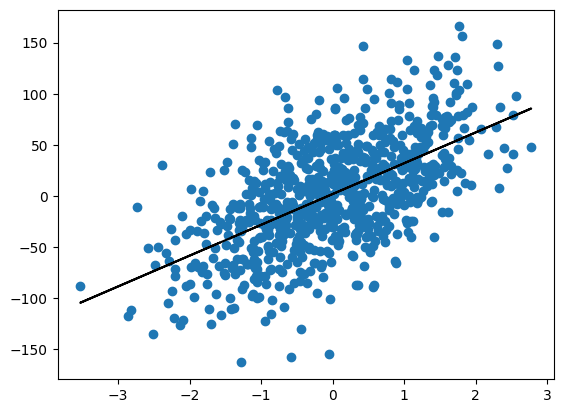

In [10]:
ridge(0.1)

Mathematical Formulation of Ridge regression for 2-dimensions

In [11]:
class RidgeRegression:
    def __init__(self,alpha):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        num = den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den = den + (((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())) + self.alpha)
            self.coef_ = num /den
            self.intercept_ = y_train.mean()-self.coef_ *X_train.mean()
    def predict(self,X_test):
        return self.coef_ *X_test+self.intercept_
        

In [12]:
m1 = RidgeRegression(0.01)
m1.fit(X_train,y_train)
y_pred1 = m1.predict(X_test)

In [13]:
r2_score(y_test,y_pred1)

0.36818526404634555

In [14]:
m1.coef_

array([29.8911993])

In [15]:
m1.intercept_

array([1.93257982])

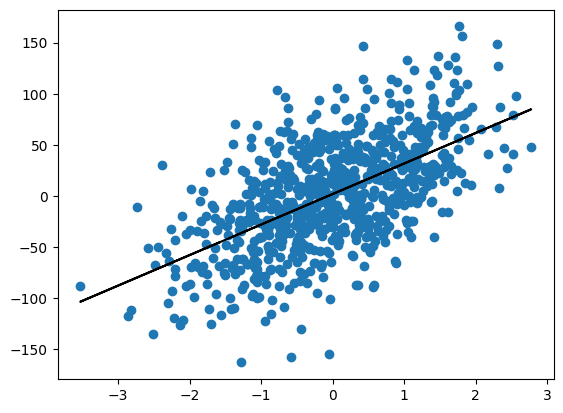

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,m1.predict(X_train), c= 'black')

Ridge Regularistaion for multi dimensional datasets

In [25]:
X,y = make_regression(n_samples = 1000,n_features = 2,noise = 23)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 1)

In [30]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.01)

In [31]:
model.fit(X_train,y_train)

Ridge(alpha=0.01)

In [34]:
y_pred = model.predict(X_test)

In [78]:
model.coef_

array([40.97564084, 57.46016991])

In [79]:
model.intercept_

1.0774083594796577

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.897607563075668

Creating class for Ridge Regression for multi dimensional datasets

In [67]:
class MyRidge:
    def __init__(self,alpha):
        self.alpha = alpha
        self.intercept_ = None
        self.coef_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        results = np.linalg.inv(np.dot(X_train.T,X_train)+ self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_ = results[0]
        self.coef_ = results[1:]
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_.reshape(-1,1)) + self.intercept_    

In [68]:
ridge = MyRidge(0.01)

In [69]:
ridge.fit(X_train,y_train)

In [70]:
ridge.coef_

array([40.97564065, 57.46017095])

In [71]:
ridge.intercept_

1.0773948006032226

In [75]:
y_pred_ridge = ridge.predict(X_test)

In [76]:
r2_score(y_test,y_pred_ridge)

0.8976075753756758